In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-product-reviews-dataset/7817_1.csv


In [18]:
amazonreviews=pd.read_csv("/kaggle/input/amazon-product-reviews-dataset/7817_1.csv")

In [19]:
amazonreviews=amazonreviews[['reviews.text','reviews.rating']]

In [20]:
amazonreviews['reviews.text']=amazonreviews['reviews.text'].str.lower()

In [21]:
import re
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [22]:
amazonreviews['reviews.text']=[str(clean_txt(x)) for x in amazonreviews['reviews.text']]

In [23]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [24]:
stop_words=set(stopwords.words("english"))

In [25]:
amazonreviewswords=amazonreviews['reviews.text'].str.split()

In [26]:
wordcloud=WordCloud(height=500,width=1000,
                    stopwords=stop_words).generate(str(amazonreviewswords))

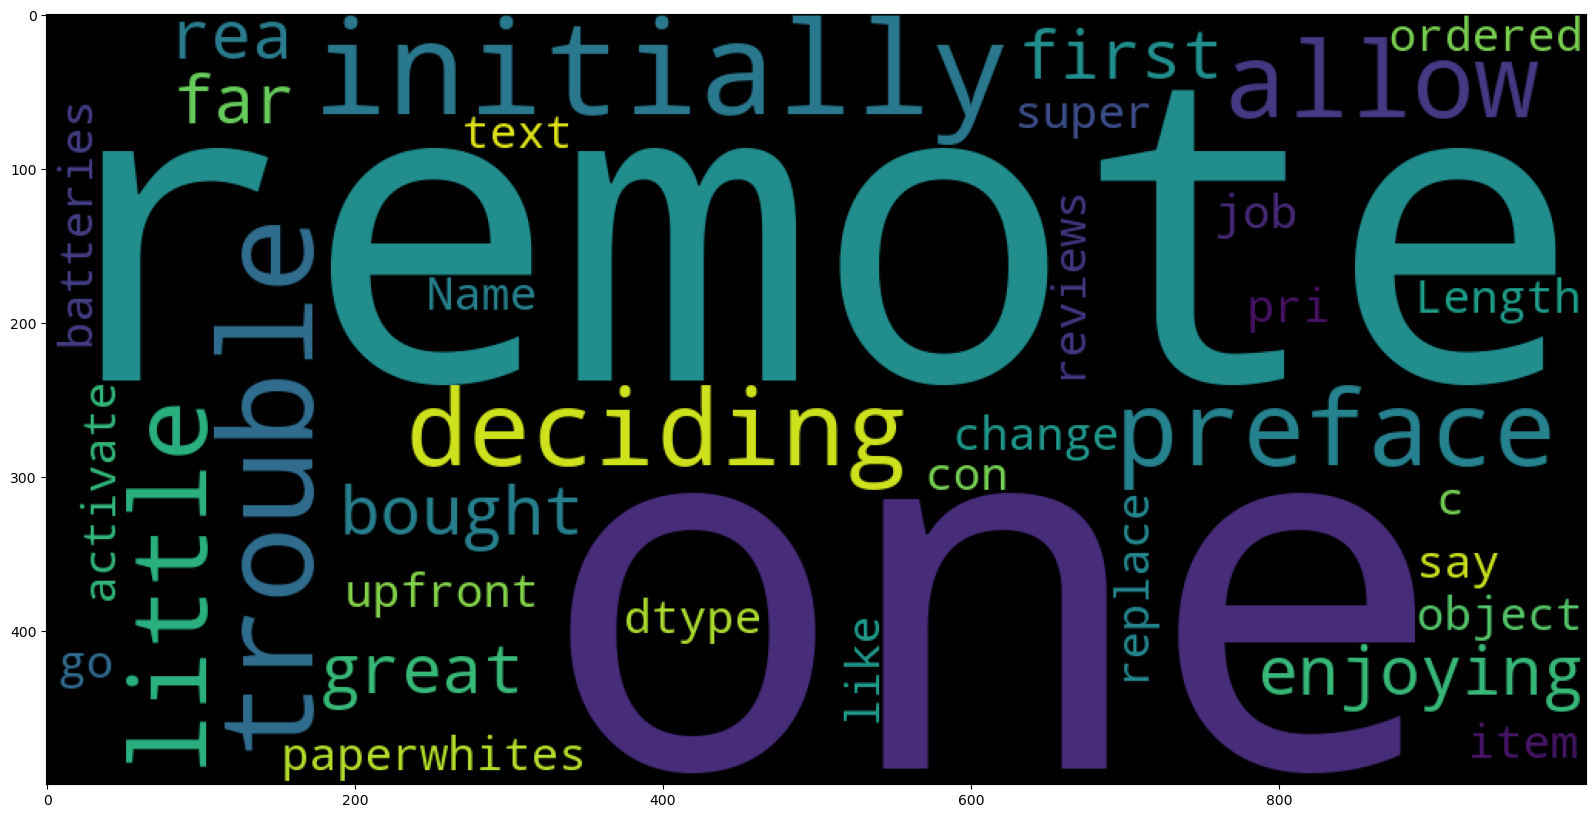

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [28]:
amazonreviewswords=amazonreviewswords.to_list()

In [29]:
from nltk import flatten
from nltk.probability import FreqDist

In [30]:
amazonreviewswords=flatten(amazonreviewswords)

In [31]:
amazonreviewswords=[w for w in amazonreviewswords if len(w)>2]

In [32]:
amazonreviewswords=[w for w in amazonreviewswords if not w in stop_words]

In [34]:
FreqDist(amazonreviewswords).most_common(100)

[('kindle', 1523),
 ('amazon', 1516),
 ('fire', 1399),
 ('like', 1247),
 ('use', 951),
 ('one', 905),
 ('read', 887),
 ('sound', 844),
 ('great', 814),
 ('headphones', 814),
 ('prime', 792),
 ('device', 780),
 ('would', 727),
 ('tablet', 711),
 ('screen', 666),
 ('apple', 642),
 ('hdx', 626),
 ('well', 616),
 ('first', 599),
 ('new', 588),
 ('really', 572),
 ('content', 571),
 ('good', 533),
 ('year', 530),
 ('nice', 522),
 ('also', 519),
 ('want', 510),
 ('review', 508),
 ('quality', 494),
 ('get', 491),
 ('time', 488),
 ('much', 473),
 ('better', 464),
 ('easy', 449),
 ('free', 423),
 ('love', 420),
 ('echo', 419),
 ('feel', 415),
 ('ipad', 406),
 ('tap', 405),
 ('product', 404),
 ('features', 396),
 ('music', 388),
 ('roku', 385),
 ('people', 377),
 ('movies', 375),
 ('even', 368),
 ('using', 360),
 ('price', 359),
 ('work', 351),
 ('think', 350),
 ('things', 349),
 ('used', 348),
 ('look', 345),
 ('still', 334),
 ('ears', 333),
 ('far', 332),
 ('never', 331),
 ('reviews', 330),
 ('

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
amazonreviews['reviews.text']=amazonreviews['reviews.text'].apply(
    lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

In [38]:
amazonreviews['reviews.text']=amazonreviews['reviews.text'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [42]:
tfidf=TfidfVectorizer(max_features=30,ngram_range=(1,2),stop_words="english")

In [43]:
X_tfidf=tfidf.fit_transform(amazonreviews['reviews.text'])

In [44]:
X_tfidf.shape

(1597, 30)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
y=LabelEncoder().fit_transform(amazonreviews['reviews.rating'])

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logit=LogisticRegression(multi_class="multinomial")

In [49]:
logitmodel=logit.fit(X_tfidf,y)

In [50]:
logitmodel.score(X_tfidf,y)

0.5835942391984972

In [51]:
logitpredict=logitmodel.predict(X_tfidf)

In [52]:
pd.crosstab(y,logitpredict)

col_0,2,3,4,5
row_0,,,,
0,1,0,35,6
1,2,1,27,4
2,39,4,55,26
3,0,15,171,50
4,4,12,576,149
5,22,3,93,302


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
tree=DecisionTreeClassifier()

In [55]:
treemodel=tree.fit(X_tfidf,y)

In [56]:
treemodel.score(X_tfidf,y)

0.7871008140262993

In [57]:
treepred=treemodel.predict(X_tfidf)

In [58]:
pd.crosstab(y,treepred)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,27,0,1,0,14,0
1,0,22,1,2,9,0
2,0,0,102,3,9,10
3,0,1,5,161,42,27
4,2,2,7,28,637,65
5,1,1,24,15,71,308


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
RF=RandomForestClassifier(n_estimators=3000)

In [64]:
RFmodel=RF.fit(X_tfidf,y)

In [65]:
RFmodel.score(X_tfidf,y)

0.7871008140262993

In [66]:
RFpred=RFmodel.predict(X_tfidf)

In [67]:
pd.crosstab(y,RFpred)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,24,0,0,0,16,2
1,0,19,0,3,11,1
2,0,0,95,2,15,12
3,0,0,0,142,62,32
4,0,0,0,11,656,74
5,0,0,21,11,67,321


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [70]:
gbmmodel=gbm.fit(X_tfidf,y)

In [71]:
gbmmodel.score(X_tfidf,y)

0.7871008140262993

In [72]:
gbmpred=gbmmodel.predict(X_tfidf)

In [73]:
pd.crosstab(y,gbmpred)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,26,0,0,0,15,1
1,0,21,0,0,13,0
2,0,0,95,2,17,10
3,0,1,0,137,67,31
4,2,1,0,8,659,71
5,0,0,21,10,70,319


In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
nb=MultinomialNB()

In [76]:
nbmodel=nb.fit(X_tfidf,y)

In [77]:
nbmodel.score(X_tfidf,y)

0.5666875391358798

In [78]:
nbpred=nbmodel.predict(X_tfidf)

In [79]:
pd.crosstab(y,nbpred)

col_0,2,4,5
row_0,,,
0,0,37,5
1,0,31,3
2,38,65,21
3,0,192,44
4,0,659,82
5,21,191,208


In [80]:
from sklearn.svm import SVC

In [81]:
sv=SVC()

In [82]:
svmodel=sv.fit(X_tfidf,y)

In [83]:
svmodel.score(X_tfidf,y)

0.6343143393863494

In [84]:
svpred=svmodel.predict(X_tfidf)

In [85]:
pd.crosstab(y,svpred)

col_0,1,2,3,4,5
row_0,,,,,
0,0,0,0,38,4
1,4,0,0,26,4
2,0,49,1,55,19
3,0,0,29,160,47
4,0,0,8,640,93
5,0,21,1,107,291


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [88]:
knn=KNeighborsClassifier()

In [93]:
k_range=list(range(1,51))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [94]:
grid_search=grid.fit(X_tfidf,y)

In [95]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=50)

In [96]:
grid_search.best_score_

0.4759447869203967

In [97]:
from sklearn.neural_network import MLPClassifier

In [114]:
nn=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=3000)

In [115]:
nnmdoel=nn.fit(X_tfidf,y)

In [116]:
nnmdoel.score(X_tfidf,y)

0.7852222917971196